In [5]:
from pandas import Series, DataFrame
import pandas as pd
%pylab inline
import statsmodels.api as sm
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
df = pd.read_csv('/Users/ReeceWooten/Documents/School /MSBA/Summer/Predictive analytics /Unsuprivised learning/Working 2/kickstarter_final.csv')



Populating the interactive namespace from numpy and matplotlib


/Users/ReeceWooten/anaconda/lib/python2.7/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [241]:
import matplotlib.pyplot as plt



In [123]:
df[:5]
df.to_csv('kickstarter_final2.csv', index=False)

In [74]:
df.loc[df['goal']<=df['pledged'], 'status'] = 1
df.loc[df['goal']>df['pledged'], 'status']= 0
df['status']=pd.to_numeric(df['status'])


pandas.core.series.Series

# CHANGING TIME STAMP TO DAYS

In [271]:
df['projectlength_days']=(df['projectlength']/(60*60*24))
df[:1]

df_not_fin=df[df['deadline']>1500076800]
df_not_fin_0=df_not_fin[df_not_fin['status']==0]
df_not_fin_0

,name,goal,pledged,state,country,deadline,state_changed_at,created_at,launched_at,staff_pick,...,static_usd_rate,location,category,projectlength,category1,subcategory,projectlength_days,status,time_b/w_create_launch,time_bw_create_launch
187,Freedom Media Network,1000.000000,0.00,WI,US,1501874968,1499282968,1499133001,1499282968,False,...,1.000000,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",2592000,journalism,audio,30.000000,0,149967,1.735729
264,The Amazing Flying Irish Woman Flugtag Nashville,2500.000000,250.00,TN,US,1501193160,1499391620,1499025965,1499391620,False,...,1.000000,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",1801540,technology,flight,20.851157,0,365655,4.232118
317,T2Q Watches Episode #1 - Italian design with a...,28056.251750,1858.00,NaN,IT,1500185375,1497593375,1493793709,1497593375,False,...,1.122250,"{""country"":""IT"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",2592000,design,product%20design,30.000000,0,3799666,43.977616
430,"""Live My Life Again"" (Canceled)",5000.000000,0.00,CA,US,1502224955,1498528794,1498328813,1498336955,False,...,1.000000,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",3888000,music,world%20music,45.000000,0,8142,0.094236
477,3fifty2 Beard Company,10000.000000,50.00,FL,US,1504980032,1499796032,1499721606,1499796032,False,...,1.000000,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",5184000,fashion,ready,60.000000,0,74426,0.861412
492,Dor'e... Most Innovative Designed Kitchen & Ba...,10000.000000,20.00,NV,US,1501367937,1496183937,1495692838,1496183937,False,...,1.000000,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",5184000,design,product%20design,60.000000,0,491099,5.684016
539,Chicago Vision Live Entertainment Venue,20000.000000,1290.00,IL,US,1504155600,1499728550,1499291520,1499728550,False,...,1.000000,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",4427050,art,mixed%20media,51.239005,0,437030,5.058218
617,Click-Strap - The self latching tie down syste...,2500.000000,1594.00,WA,US,1503687960,1499899233,1497301405,1499899232,False,...,1.000000,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",3788728,design,product%20design,43.851019,0,2597827,30.067442
650,Lloyd Hamilton - silent comedian,3879.813720,3550.00,England,GB,1501165887,1499351487,1499344048,1499351487,False,...,1.293271,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",1814400,film,NaN,21.000000,0,7439,0.086100
676,Entries,1500.000000,0.00,IL,US,1502388000,1499088792,1498748513,1499088792,False,...,1.000000,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",3299208,music,r,38.185278,0,340279,3.938414


In [236]:
df['time_bw_create_launch']=df['launched_at']-df['created_at']
df['time_bw_create_launch']=(df['time_bw_create_launch']/(60*60*24))
df[:1]
list(df)

['name',
 'goal',
 'pledged',
 'state',
 'country',
 'deadline',
 'state_changed_at',
 'created_at',
 'launched_at',
 'staff_pick',
 'backers_count',
 'usd_pledged',
 'static_usd_rate',
 'location',
 'category',
 'projectlength',
 'category1',
 'subcategory',
 'projectlength_days',
 'status',
 'time_b/w_create_launch',
 'time_bw_create_launch']

In [237]:
backers_cat=df[['backers_count','category1']]
backers_cat_stat=backers_cat.groupby('category1').describe()
backers_cat_stat

backers_count                                                    \
                    count        mean          std  min   25%   50%     75%   
category1                                                                     
art                4760.0   41.535714   344.779124  0.0   2.0   9.0   36.00   
comics             1317.0  160.582384   420.104241  0.0  11.0  45.0  138.00   
crafts              957.0   19.137931    62.201436  0.0   1.0   3.0   10.00   
dance               357.0   35.089636    43.581292  0.0   4.0  21.0   51.00   
design             2097.0  440.270386  2033.722392  0.0  13.0  77.0  287.00   
fashion            2736.0   65.642544   313.512828  0.0   1.0   5.0   37.00   
film               7952.0   96.016097  1085.043809  0.0   3.0  21.0   66.00   
food               3156.0   39.154309   111.435261  0.0   1.0   4.0   25.00   
games              3710.0  513.054717  2134.211020  0.0   7.0  73.0  321.75   
journalism          713.0   37.886396   193.149196  0.0   0.0   2.0    8.00   
music              8263.0   52.641293   135.303278  0.0   2.0  22.0   64.00   
photography        1194.0   35.159966   117.585590  0.0   1.0   3.0   20.00   
publishing         5933.0   71.653632   266.193191  0.0   2.0  15.0   62.00   
technology         5736.0  170.767782   833.516306  0.0   1.0   6.0   52.00   
theater             932.0   47.245708   149.829401  0.0   4.0  19.0   50.00   

                      
                 max  
category1             
art          22840.0  
comics        6435.0  
crafts        1069.0  
dance          294.0  
design       62642.0  
fashion       9624.0  
film         91585.0  
food          2165.0  
games        69320.0  
journalism    3116.0  
music         4905.0  
photography   2687.0  
publishing    9044.0  
technology   21412.0  
theater       3722.0

TypeError: unsupported operand type(s) for -: 'str' and 'float'

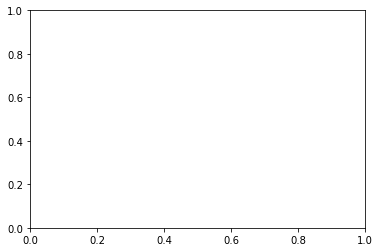

In [251]:
x=backers_cat_stat.index
backers_cat_stat['backers_count']['mean']
plt.bar(backers_cat_stat.index,backers_cat_stat['backers_count']['mean'])

In [231]:
pledged_cat=df[['usd_pledged','category1']]

pledged_cat_stat=pledged_cat.groupby('category1').describe()
pledged_cat_stat

usd_pledged                                                \
                  count          mean            std  min         25%   
category1                                                               
art              4760.0   3042.986386   22210.814856  0.0   28.057971   
comics           1317.0   7879.523307   28808.324656  0.0  325.000000   
crafts            957.0   1297.015515    5327.262964  0.0    1.000000   
dance             357.0   3064.782536    4722.557328  0.0  172.000000   
design           2097.0  44715.658122  374885.522046  0.0  565.000000   
fashion          2736.0   6732.499053   31047.170879  0.0    4.000000   
film             7952.0   8248.146472   68354.262348  0.0   76.000000   
food             3156.0   3807.838668   11059.899267  0.0    2.000000   
games            3710.0  29984.092931  158717.968874  0.0  204.040709   
journalism        713.0   2405.135173   11214.772674  0.0    0.000000   
music            8263.0   3728.466506    9043.800899  0.0   65.000000   
photography      1194.0   2820.270929    8143.555916  0.0    1.000000   
publishing       5933.0   4338.948681   15139.939431  0.0   51.000000   
technology       5736.0  23268.256793  124940.549155  0.0   10.000000   
theater           932.0   4008.423815   10712.375886  0.0  131.619903   

                                                     
                     50%           75%          max  
category1                                            
art           419.100118   2211.500000   1365105.45  
comics       1690.000000   5709.000000    665725.94  
crafts         59.529214    523.000000     86207.00  
dance        1469.400933   4154.000000     46270.09  
design       5230.000000  23569.284659  13285226.36  
fashion       208.500000   3001.000000    654557.00  
film         1505.500000   6213.940000   5702153.38  
food          110.558560   2113.750000    255669.50  
games        3143.687291  15487.798596   6333295.77  
journalism     26.000000    457.740276    171755.09  
music        1194.516738   4352.500000    326593.51  
photography   101.000000   1355.500000    107193.35  
publishing    725.000000   3775.000000    613251.44  
technology    313.150131   5289.250000   3401361.08  
theater      1233.195431   3894.891598    169985.91

In [296]:
successful=df[df['status']==1]
df['kickstarter_cut']=successful['usd_pledged']*.08

In [298]:
df[:5]

,name,goal,pledged,state,country,deadline,state_changed_at,created_at,launched_at,staff_pick,...,location,category,projectlength,category1,subcategory,projectlength_days,status,time_b/w_create_launch,time_bw_create_launch,kickstarter_cut
0,Racial Reconciliation Music Project,5000.00000,262.00,NC,US,1479358740,1479358740,1476729788,1476818224,False,...,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",2540516,music,faith,29.40412,0,88436,1.023565,NaN
1,Poetic Cultivation,1500.00000,0.00,FL,US,1407002463,1407002463,1404240350,1404410463,False,...,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",2592000,publishing,poetry,30.00000,0,170113,1.968900,NaN
2,Picoso's Fourth Album,9800.00000,9875.00,WA,US,1404043201,1404043214,1400739079,1400932801,False,...,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",3110400,music,world%20music,36.00000,1,193722,2.242153,790.0
3,Sounds Like Sunday: Classic Hymns/ Modern Expr...,3500.00000,3500.00,OK,US,1348981138,1348981138,1344830744,1345093138,False,...,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",3888000,music,rock,45.00000,1,262394,3.036968,280.0
4,Slightly Magic 8bit Legacy Edition PLUS Slight...,11282.46126,1691.01,England,GB,1387184197,1387184198,1383644248,1384764997,False,...,"{""country"":""GB"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",2419200,games,video%20games,28.00000,0,1120749,12.971632,NaN


# SIMPLE REGRESSION

In [218]:
y, X = dmatrices('usd_pledged ~ time_bw_create_launch+projectlength_days+backers_count+staff_pick+category1+country+state+subcategory', data=df, return_type='dataframe')


In [219]:
model = sm.OLS(y, X)       # Set up the model
result = model.fit()       # Fit model (find the intercept and slopes)
print result.summary()

                            OLS Regression Results                            
Dep. Variable:            usd_pledged   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     121.9
Date:                Fri, 11 Aug 2017   Prob (F-statistic):               0.00
Time:                        19:19:13   Log-Likelihood:            -4.9830e+05
No. Observations:               39874   AIC:                         9.977e+05
Df Residuals:                   39337   BIC:                         1.002e+06
Df Model:                         536                                         
Covariance Type:            nonrobust                                         
                                          coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
In

In [226]:
p_values=result.pvalues
p_values[p_values<=.05]

staff_pick[T.True]                    4.967591e-09
category1[T.design]                   2.081657e-02
category1[T.film]                     1.056530e-04
category1[T.games]                    1.225745e-08
category1[T.journalism]               2.268555e-26
category1[T.technology]               1.237136e-43
state[T.Anhui]                        1.180612e-17
state[T.Bavaria]                      4.458735e-03
state[T.Bremen]                       9.078454e-03
state[T.Brittany]                     1.145189e-04
state[T.Hovedstaden]                  8.786243e-05
state[T.Ljubljana]                    8.940548e-04
state[T.Lodz]                         2.839422e-22
state[T.Midtjylland]                  1.555923e-02
state[T.Phuket]                       1.475025e-06
state[T.Prague]                       5.912120e-16
state[T.Syddanmark]                   1.910633e-02
subcategory[T.apps]                   1.688368e-41
subcategory[T.audio]                  7.135946e-16
subcategory[T.camera%20equipmen

# LOGISTIC REGRESSION

In [201]:
from sklearn.linear_model import LogisticRegression
formula = 'status ~ 0+projectlength_days+backers_count+staff_pick+category1+country+state+subcategory'
Y, X = dmatrices(formula, df, return_type='dataframe')
y=Y['status'].values

In [202]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [203]:
model = LogisticRegression()
result = model.fit(X_train, y_train)


In [204]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

0.840098885744


In [205]:
prediction = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

0.837080999749


In [206]:
print 'Number of positive examples =', len(y_train[y_train==1])
print 'Number of negative examples =', len(y_train[y_train==0])

Number of positive examples = 10880
Number of negative examples = 17031


In [207]:
negative_examples_in_test = len(y_test[y_test==0])
total_examples_in_test = len(y_test)

print 'Number of examples where baseline is correct =', negative_examples_in_test
print 'Baseline accuracy =', negative_examples_in_test * 1.0 / total_examples_in_test

Number of examples where baseline is correct = 7334
Baseline accuracy = 0.61305692552


In [208]:
model.coef_

array([[ -5.49504652e-01,   2.15250587e-01,   1.79448318e-01,
         -1.67821819e-01,   2.23339646e-01,   1.25973653e-01,
         -4.84337254e-01,   0.00000000e+00,  -7.61316083e-01,
         -4.05423570e-01,  -6.16036378e-01,   4.57553007e-01,
         -3.40505284e-01,   7.08894928e-02,  -8.71301193e-01,
          4.54864038e-01,   4.26153544e-01,  -9.97024448e-02,
          6.83379175e-01,   4.42474207e-02,  -6.59221310e-01,
          7.07864539e-01,  -4.95886886e-01,   1.40249927e-01,
         -1.88054367e+00,  -1.56109576e-02,  -3.56031176e-01,
         -4.77409423e-01,  -2.98839449e-02,   5.48515695e-01,
         -4.39530541e-01,   1.27552131e-02,   2.51573363e-01,
          1.08235467e+00,   0.00000000e+00,   5.32522953e-01,
          1.74962333e-01,   4.52885970e-01,  -3.61631930e-01,
          1.71731195e-02,  -2.18713752e-01,  -3.89738040e-02,
         -1.00202710e-02,  -6.78896886e-02,  -7.44296202e-03,
          7.75825865e-02,  -3.07943977e-03,  -1.86890334e-01,
        

In [209]:
weights = Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values()

country[T.GB]                         -1.880544
subcategory[T.mobile%20games]         -1.219326
subcategory[T.hip]                    -1.069535
subcategory[T.architecture]           -0.949641
category1[T.technology]               -0.871301
subcategory[T.gadgets]                -0.835261
category1[T.food]                     -0.761316
subcategory[T.playing%20cards]        -0.738626
subcategory[T.wearables]              -0.735469
subcategory[T.video%20games]          -0.734867
subcategory[T.apps]                   -0.730088
subcategory[T.food%20trucks]          -0.672703
country[T.DE]                         -0.659221
category1[T.journalism]               -0.616036
subcategory[T.r]                      -0.604707
subcategory[T.young%20adult]          -0.596136
subcategory[T.diy]                    -0.557556
staff_pick[False]                     -0.549505
subcategory[T.interactive%20design]   -0.542093
subcategory[T.software]               -0.529506
subcategory[T.periodicals]            -0

# LOGISTIC ( creator's view)

In [210]:
df[:1]

,name,goal,pledged,state,country,deadline,state_changed_at,created_at,launched_at,staff_pick,...,static_usd_rate,location,category,projectlength,category1,subcategory,projectlength_days,status,time_b/w_create_launch,time_bw_create_launch
0,Racial Reconciliation Music Project,5000.0,262.0,NC,US,1479358740,1479358740,1476729788,1476818224,False,...,1.0,"{""country"":""US"",""urls"":{""web"":{""discover"":""htt...","{""urls"":{""web"":{""discover"":""http://www.kicksta...",2540516,music,faith,29.40412,0,88436,1.023565


In [211]:
from sklearn.linear_model import LogisticRegression
formula = 'status ~ 0+projectlength_days+goal+category1+country+state+subcategory'
Y, X = dmatrices(formula, df, return_type='dataframe')
y=Y['status'].values

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)


In [213]:
model = LogisticRegression()
result = model.fit(X_train, y_train)


In [214]:
from sklearn import metrics

prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

0.610189531009


In [215]:
prediction = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

0.61305692552


In [216]:
model.coef_
weights = Series(model.coef_[0],
                 index=X.columns.values)
weights.sort_values()

projectlength_days                 -0.008336
country[T.GB]                      -0.000147
state[T.England]                   -0.000126
category1[technology]              -0.000106
category1[food]                    -0.000079
category1[fashion]                 -0.000067
subcategory[T.apps]                -0.000047
subcategory[T.web]                 -0.000047
subcategory[T.hip]                 -0.000041
category1[art]                     -0.000040
state[T.FL]                        -0.000037
category1[photography]             -0.000033
category1[crafts]                  -0.000033
subcategory[T.apparel]             -0.000032
category1[publishing]              -0.000027
subcategory[T.software]            -0.000024
category1[journalism]              -0.000023
subcategory[T.mobile%20games]      -0.000019
subcategory[T.food%20trucks]       -0.000017
subcategory[T.painting]            -0.000015
goal                               -0.000014
country[T.AU]                      -0.000014
subcategor

# TREE (CREATER'S VIEW)

In [106]:
from sklearn import tree
model = tree.DecisionTreeClassifier(criterion='entropy')

In [107]:
result = model.fit(X_train, y_train)

In [108]:
from sklearn import metrics



In [109]:
model2 = tree.DecisionTreeClassifier(criterion='entropy', max_depth=2)
result = model2.fit(X_train, y_train)

In [110]:
prediction_train = model2.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

0.660599763534


In [111]:
prediction = model2.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

0.663880297584


# RANDOM FOREST (CREATER'S VIEW)

In [182]:
from sklearn import ensemble


In [183]:
model =ensemble.RandomForestClassifier(n_estimators=200,criterion='entropy')
result = model.fit(X_train, y_train)

In [184]:
prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

0.987746766508


In [185]:
prediction = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

0.70868511243


# BOOSTING (CREATER'S VIEW)

In [272]:
model=ensemble.GradientBoostingClassifier(n_estimators=500,learning_rate=.01,max_depth=4)
result = model.fit(X_train, y_train)

In [176]:
model=ensemble.GradientBoostingClassifier(n_estimators=500,learning_rate=.01,max_depth=4)
result = model.fit(X_train, y_train)


In [273]:
prediction_train = model.predict(X_train)
print metrics.accuracy_score(y_train, prediction_train)

0.734728243345


In [274]:
prediction = model.predict(X_test)
print metrics.accuracy_score(y_test, prediction)

0.734765527042


In [ ]:
pd.crosstab(merge_25['top category_y'],merge_25['top category_x'])

In [287]:
metrics.confusion_matrix(y_test,prediction,labels=[0,1])

array([[6588,  746],
       [2427, 2202]])

Thus in binary classification, the count of true negatives is C_{0,0}, false negatives is C_{1,0}, true positives is C_{1,1} and false positives is C_{0,1}.